In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
train_image_path="dataset/images/train/"
val_image_path="dataset/images/val/"

In [3]:
column_names = ["filename", "label", "x_center", "y_center", "width", "height"] 

In [4]:
df = pd.read_csv("pool_dataset.txt", sep=r"\s+", engine="python", names=column_names)  # Space-separated values

In [5]:
df

,filename,label,x_center,y_center,width,height
0,billiard_0.png,1,0.760343,0.285048,0.030000,0.050000
1,billiard_0.png,6,0.699224,0.585844,0.030000,0.050000
2,billiard_0.png,10,0.710857,0.694815,0.030000,0.050000
3,billiard_0.png,15,0.254781,0.255444,0.030000,0.050000
4,billiard_0.png,13,0.395427,0.542398,0.030000,0.050000
...,...,...,...,...,...,...
143062,billiard_11999.png,3,0.974257,2.273833,0.127702,0.399423
143063,billiard_11999.png,14,0.587585,0.544533,0.023851,0.048473
143064,billiard_11999.png,11,0.562068,0.529587,0.022971,0.047451
143065,billiard_11999.png,2,0.280959,0.488256,0.024107,0.044246


In [6]:
# Replace commas with dots and convert to float
# df["x_center"] = df["x_center"].str.replace(",", ".").astype(float)
# df["y_center"] = df["y_center"].str.replace(",", ".").astype(float)
# df["width"] = df["width"].str.replace(",", ".").astype(float)
# df["height"] = df["height"].str.replace(",", ".").astype(float)
df["label"] = df["label"].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143067 entries, 0 to 143066
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   filename  143067 non-null  object 
 1   label     143067 non-null  object 
 2   x_center  143067 non-null  float64
 3   y_center  143067 non-null  float64
 4   width     143067 non-null  float64
 5   height    143067 non-null  float64
dtypes: float64(4), object(2)
memory usage: 6.5+ MB


In [8]:
import re

In [9]:
def show_images_with_bboxes(df, index, rows):
    fig, axes = plt.subplots(rows, 2, figsize=(12, 12))  # 2x2 grid layout
    start_index = max(0, index - 4)  # Ensure start index is non-negative
    
    for i, ax in enumerate(axes.flat):
        current_index = start_index + i
        
        image_path = f"dataset/images/train/billiard_{current_index}.png"  # Construct the image path
        img = cv2.imread(image_path)  # Load the image
        if img is None:
            print(f"Warning: Image at {image_path} not found.")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

        # Get image dimensions
        height, width, _ = img.shape

        # Get bounding boxes for the specific image
        image_name = f"billiard_{current_index}.png"
        bboxes = df[df["filename"] == image_name]

        # Draw bounding boxes
        for _, row in bboxes.iterrows():
            x_c, y_c, w, h, label = row["x_center"], row["y_center"], row["width"], row["height"], row["label"]
            
            # Convert YOLO format to absolute pixel coordinates
            x_min = int((x_c - w / 2) * width)
            y_min = int((y_c - h / 2) * height)
            x_max = int((x_c + w / 2) * width)
            y_max = int((y_c + h / 2) * height)

            # Draw rectangle
            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Add label
            cv2.putText(img, label, (x_min, max(y_min - 10, 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Display the image in the grid
        ax.imshow(img)
        ax.set_title(image_name)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

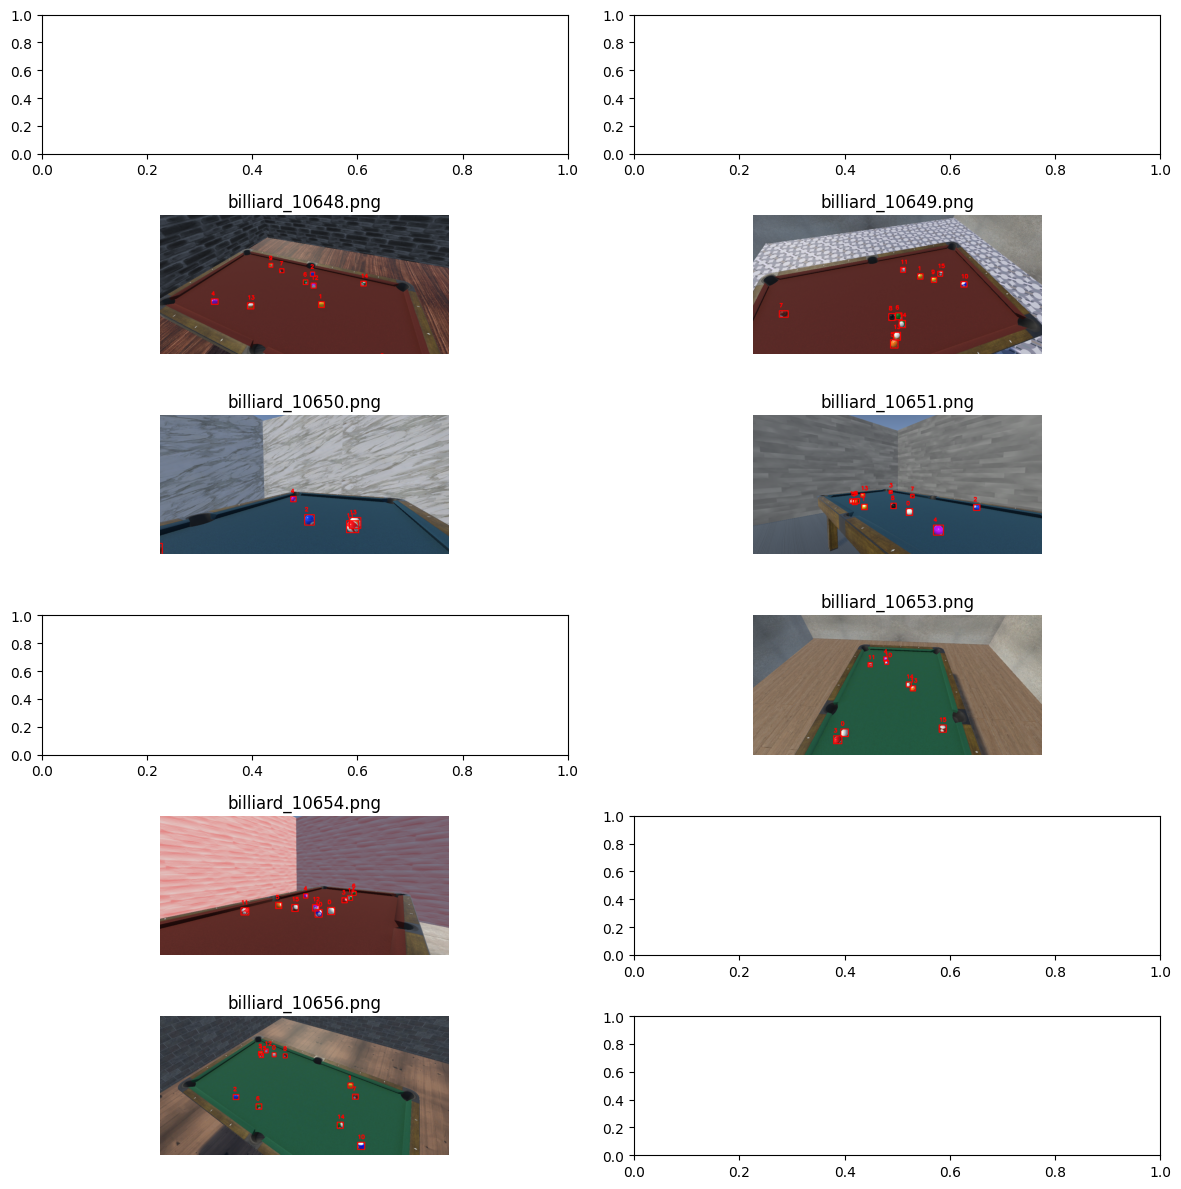

In [10]:
# Example usage
# image_names = ["billiard_10001.png", "billiard_10003.png", "billiard_10006.png", "billiard_2243.png"]
# image_paths = [f"{train_image_path}{image_names[0]}", f"{train_image_path}{image_names[1]}", f"{train_image_path}{image_names[2]}", f"{train_image_path}{image_names[3]}"]
show_images_with_bboxes(df, 10650, 6)

In [11]:
cols_to_check = ['x_center', 'y_center', 'width', 'height']
count_per_file = df.groupby('filename')[cols_to_check].apply(lambda x: ((x < 0) | (x > 1)).sum().sum())

# Filter out filenames with count == 0
count_per_file = count_per_file[count_per_file > 0]
file_count = count_per_file.count()

print(f"Rows with values <0 or >1: {count_per_file}, files: {file_count}")

Rows with values <0 or >1: filename
billiard_10000.png    9
billiard_10001.png    3
billiard_10002.png    1
billiard_10003.png    2
billiard_10004.png    1
                     ..
billiard_9990.png     2
billiard_9992.png     1
billiard_9995.png     5
billiard_9997.png     3
billiard_9998.png     2
Length: 6688, dtype: int64, files: 6688


### Max in x_center

In [12]:
print(df['x_center'].max(), "\n", df[df["x_center"] == 112191.8])

112191.8 
                 filename label  x_center  y_center     width    height
48492  billiard_3483.png     8  112191.8  246536.7  224374.7  493053.6


In [13]:
df[df["filename"] == "billiard_3483.png"]

,filename,label,x_center,y_center,width,height
48486,billiard_3483.png,1,0.988700,0.722540,0.082672,0.115279
48487,billiard_3483.png,6,0.242900,0.935682,0.082004,0.161986
48488,billiard_3483.png,15,0.785673,1.489049,0.135056,0.349539
48489,billiard_3483.png,13,701.855200,1284.463000,1383.710000,2532.080000
48490,billiard_3483.png,4,2.759873,1.779076,0.723591,0.489479
48491,billiard_3483.png,12,0.044854,0.620892,0.068031,0.096324
48492,billiard_3483.png,8,112191.800000,246536.700000,224374.700000,493053.600000
48493,billiard_3483.png,7,0.941569,0.410261,0.043580,0.062617
48494,billiard_3483.png,3,0.151475,0.662049,0.064003,0.103731
48495,billiard_3483.png,5,1.489707,0.907419,0.174027,0.155180


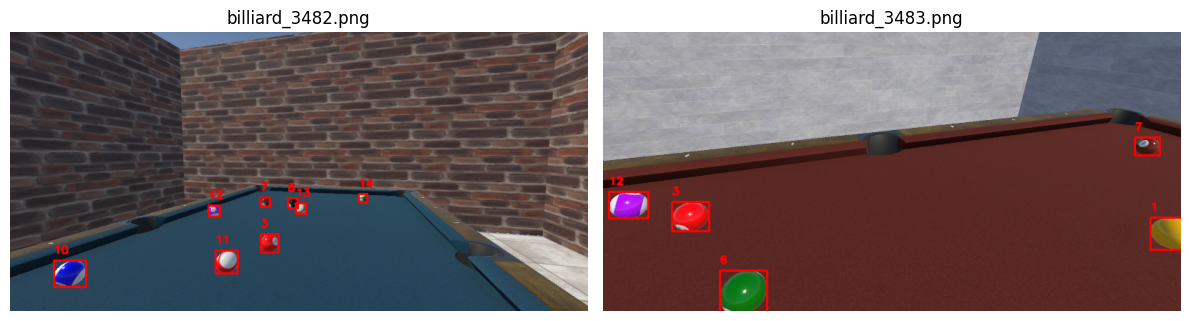

In [14]:
show_images_with_bboxes(df, 3486, 1)

### Min in x_center

In [15]:
print(df['x_center'].min(), "\n", df[df["x_center"] == -97095.45])

-97095.45 
                   filename label  x_center  y_center     width    height
128093  billiard_10650.png    15 -97095.45  172469.4  194183.6  344924.8


In [16]:
df[df["filename"] == "billiard_10650.png"]

,filename,label,x_center,y_center,width,height
128091,billiard_10650.png,6,-0.727018,1.724710,0.414198,0.483034
128092,billiard_10650.png,10,0.171091,1.628654,0.159031,0.424478
128093,billiard_10650.png,15,-97095.450000,172469.400000,194183.600000,344924.800000
128094,billiard_10650.png,13,0.675198,0.778316,0.039117,0.078688
128095,billiard_10650.png,4,0.461861,0.608191,0.018102,0.037585
128096,billiard_10650.png,8,-2746.586000,3707.206000,5103.469000,6867.679000
128097,billiard_10650.png,7,-0.039937,0.994995,0.096474,0.141049
128098,billiard_10650.png,11,0.666663,0.805570,0.042010,0.085777
128099,billiard_10650.png,2,0.517413,0.757055,0.033939,0.073412


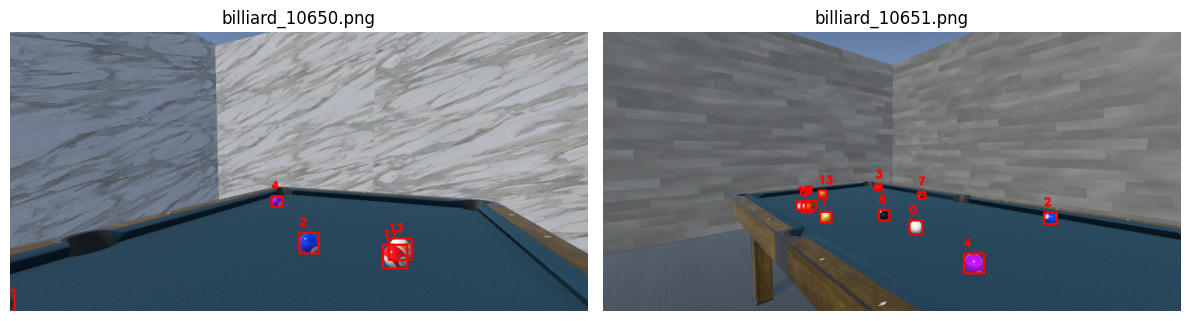

In [17]:
show_images_with_bboxes(df, 10654, 1)

In [18]:
dfs = pd.read_csv("Annotations/billiard_dataset_dynamic.txt", sep=r"\s+", engine="python", names=column_names)  # Space-separated values

FileNotFoundError: [Errno 2] No such file or directory: 'Annotations/billiard_dataset_dynamic.txt'

In [ ]:
dfs.head()

,filename,label,x_center,y_center,width,height
0,billiard_2000.png,6,"0,5803493","0,7279717","0,02167772","0,04551775"
1,billiard_2000.png,10,"0,3762904","0,5119374","0,01179444","0,02349779"
2,billiard_2000.png,15,"0,5585614","0,6607866","0,01834416","0,03835735"
3,billiard_2000.png,13,"0,5507792","0,614009","0,01614267","0,03349946"
4,billiard_2000.png,4,"0,4700318","0,544719","0,01287691","0,02660174"


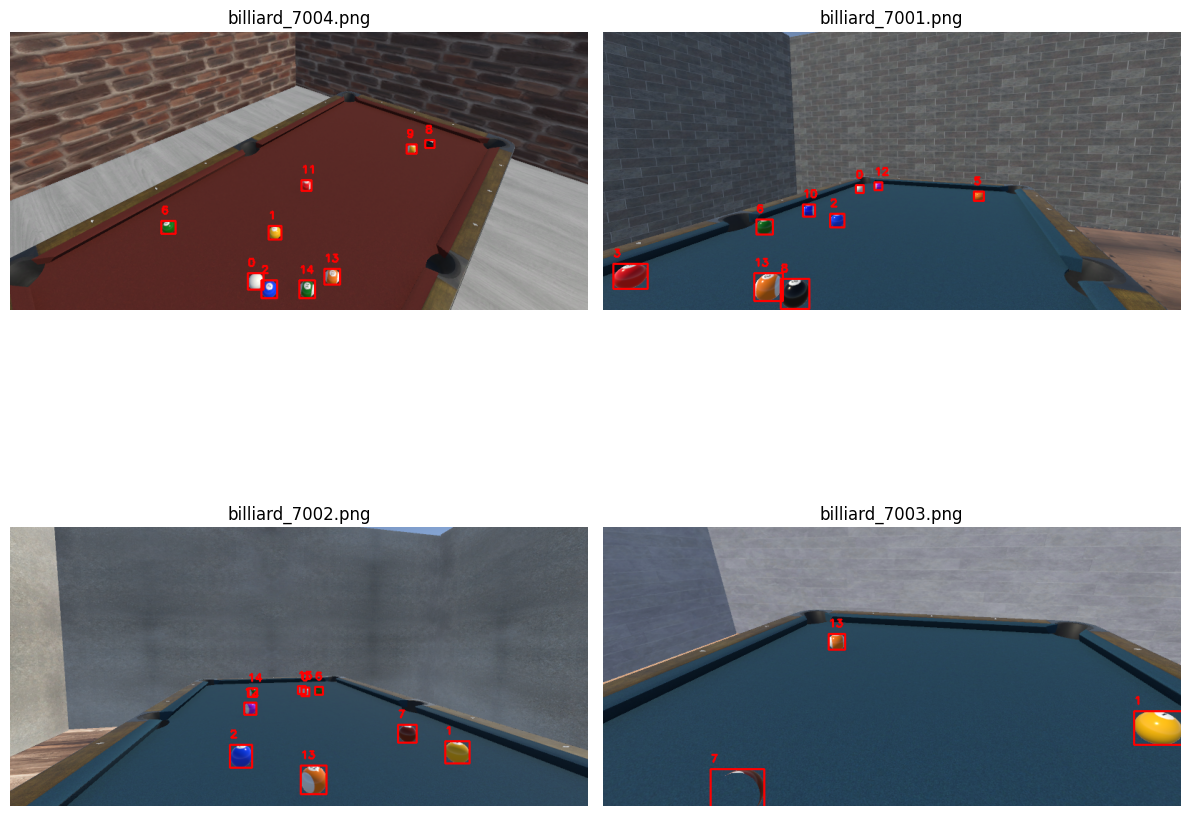

In [ ]:
image_names = ["billiard_7004.png", "billiard_7001.png", "billiard_7002.png", "billiard_7003.png"]
image_paths = [f"DatasetImages/dynamic/{image_names[0]}", f"DatasetImages/dynamic/{image_names[1]}", f"DatasetImages/dynamic/{image_names[2]}", f"DatasetImages/dynamic/{image_names[3]}"]
show_images_with_bboxes(image_paths, dfs, image_names)

In [ ]:
merged_df = pd.concat([df, dfs], axis=0)  # Merge row-wise

In [ ]:
merged_df.head()

,filename,label,x_center,y_center,width,height
0,billiard_0.png,1,0.760343,0.285048,0.03,0.05
1,billiard_0.png,6,0.699224,0.585844,0.03,0.05
2,billiard_0.png,10,0.710857,0.694815,0.03,0.05
3,billiard_0.png,15,0.254781,0.255444,0.03,0.05
4,billiard_0.png,13,0.395427,0.542398,0.03,0.05


In [ ]:
merged_df.tail()

,filename,label,x_center,y_center,width,height
111062,billiard_11999.png,3,0.974257,2.273833,0.127702,0.399423
111063,billiard_11999.png,14,0.587585,0.544533,0.023851,0.048473
111064,billiard_11999.png,11,0.562068,0.529587,0.022971,0.047451
111065,billiard_11999.png,2,0.280959,0.488256,0.024107,0.044246
111066,billiard_11999.png,0,0.677414,1.055488,0.045087,0.102164


In [ ]:
# Save as CSV
merged_df.to_csv("pool_dataset.csv", index=False)
